In [1]:
import numpy as np
import pandas as pd

C:\Users\3 STAR\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("spam email.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# 1. Data Cleaning.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(6)

,v1,v2
5293,ham,I donno its in your genes or something
1069,ham,Jus finish bathing...
2521,ham,"Sorry, I'll call later"
1452,ham,"That's good, because I need drugs"
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t..."
5490,ham,K. I will sent it again


In [7]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [8]:
df.sample(6)

,target,text
2441,ham,Back in brum! Thanks for putting us up and kee...
2346,ham,Its posible dnt live in &lt;#&gt; century cm ...
2354,ham,R we going with the &lt;#&gt; bus?
2482,ham,Pansy! You've been living in a jungle for two ...
1297,ham,"K so am I, how much for an 8th? Fifty?"
5299,ham,Well good morning mr . Hows london treatin' ya...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2. EDA.

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

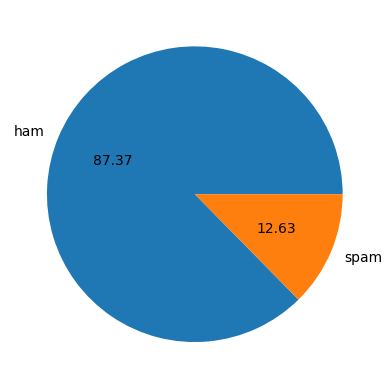

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
# Data imbalanced
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [23]:
df['num_character'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] =df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentances'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_character,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_character','num_words', 'num_sentances']].describe()

,num_character,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# for Ham
df[df['target'] == 0][['num_character','num_words', 'num_sentances']].describe()  

,num_character,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# for spam
df[df['target'] == 1][['num_character','num_words', 'num_sentances']].describe()  

,num_character,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

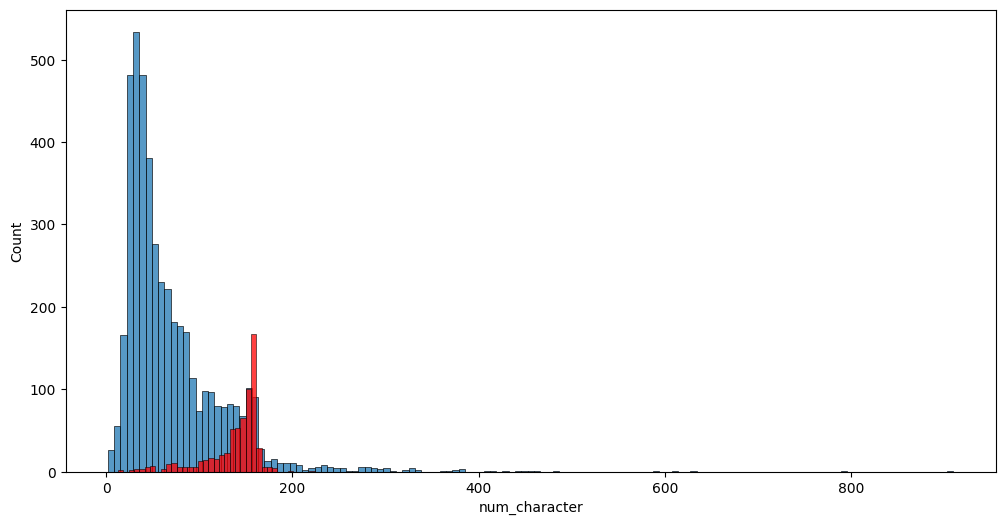

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_character'])
sns.histplot(df[df['target'] ==1]['num_character'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

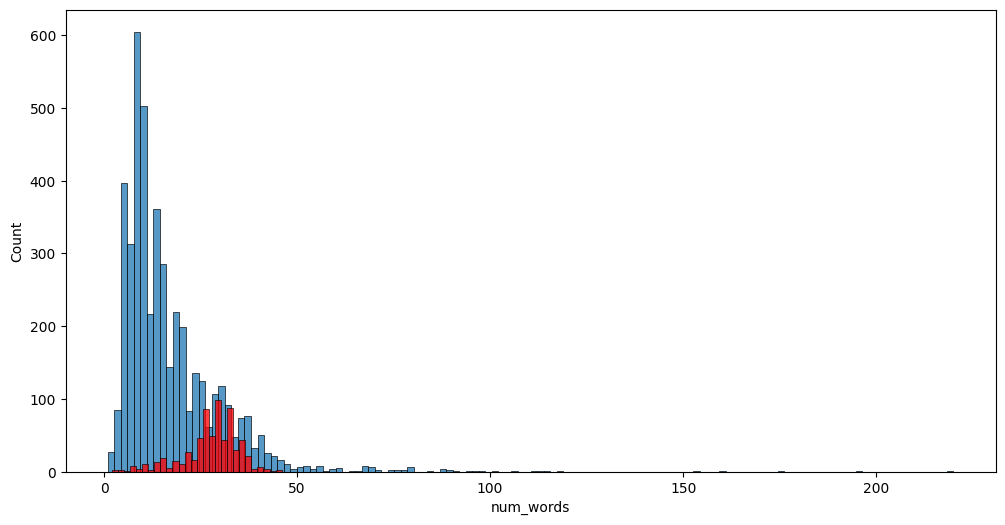

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'], color='red')

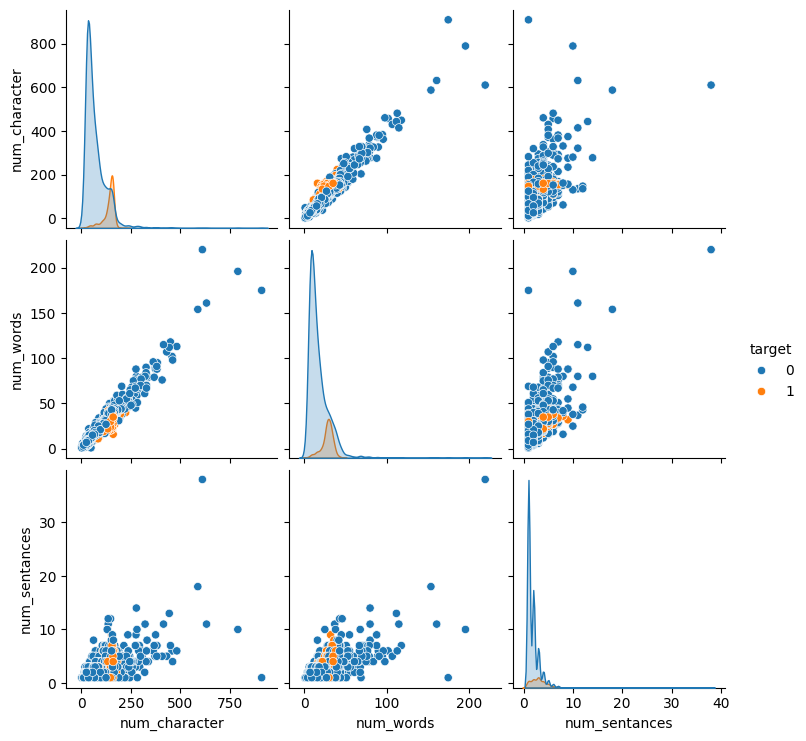

In [35]:
# corr coef
sns.pairplot(df,hue='target')

In [36]:
# corr
df.select_dtypes(include="number").corr()

,target,num_character,num_words,num_sentances
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentances,0.263939,0.624139,0.679971,1.000000


<Axes: >

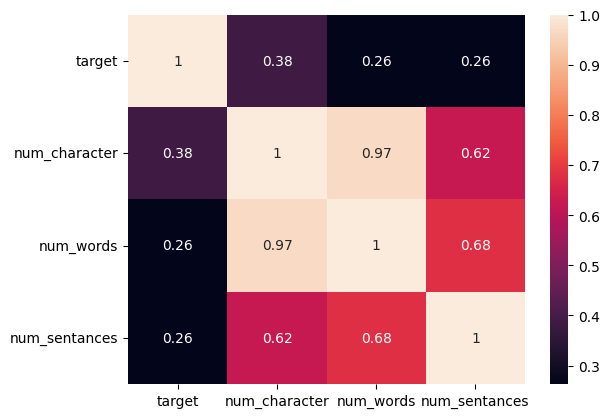

In [37]:
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

# Data Preprocessing
## .Lower case
## .Tokenization
## .Removing special character
## .Removing stop words and punctuation
## .Stemming

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loveing')

'love'

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [43]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_character,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

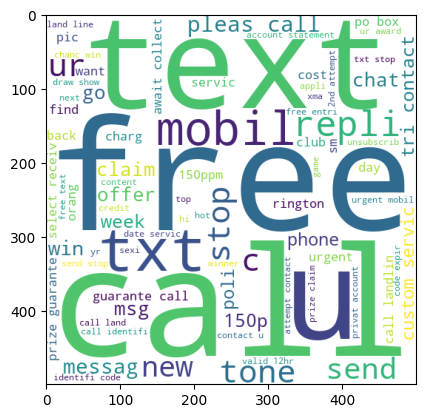

In [48]:
plt.imshow(spam_wc)

In [49]:
Ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

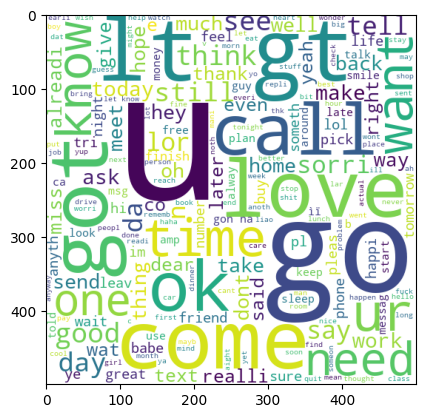

In [50]:
plt.imshow(Ham_wc)

In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
# also for ham sms

In [52]:
len(spam_corpus)

9939

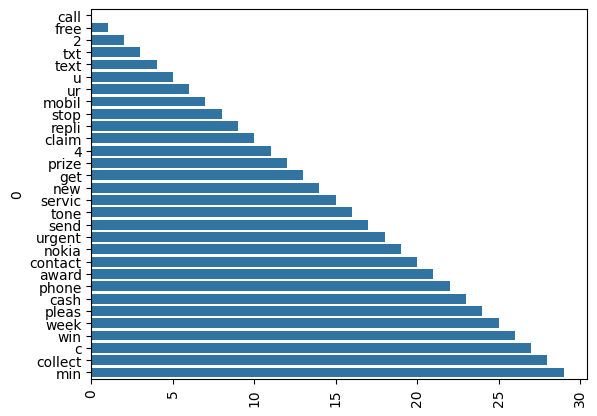

In [53]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation= 'vertical')
plt.show()

<Axes: ylabel='1'>

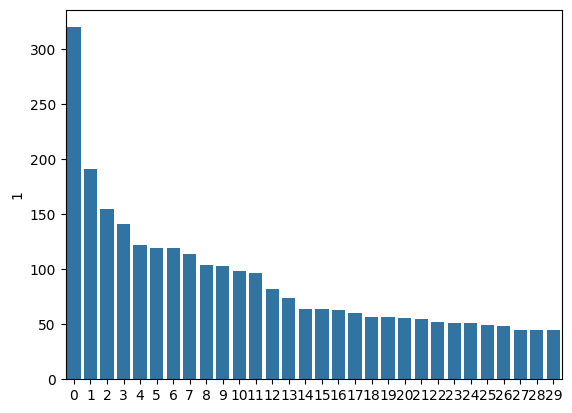

In [54]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# 4.Model Building.

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [92]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [93]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [94]:
x.shape

(5169, 3000)

In [95]:
y = df['target'].values

In [96]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [99]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [100]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [101]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("AS",accuracy_score(y_test,y_pred1))
print("PS", precision_score(y_test,y_pred1))
print("CM",confusion_matrix(y_test,y_pred1))

AS 0.8694390715667312
PS 0.5068493150684932
CM [[788 108]
 [ 27 111]]


In [102]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("AS",accuracy_score(y_test,y_pred2))
print("PS", precision_score(y_test,y_pred2))
print("CM",confusion_matrix(y_test,y_pred2))

AS 0.9709864603481625
PS 1.0
CM [[896   0]
 [ 30 108]]


In [67]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("AS",accuracy_score(y_test,y_pred3))
print("PS", precision_score(y_test,y_pred3))
print("CM",confusion_matrix(y_test,y_pred3))

AS 0.9835589941972921
PS 0.991869918699187
CM [[895   1]
 [ 16 122]]


In [68]:
#  tfidf -->MNB

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [71]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [72]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train,y_train)
    y_pred01 = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred01)
    precision = precision_score(y_test,y_pred01)
    
    return accuracy,precision

In [73]:
train_classifier(svc, x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [74]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9284332688588007
Precision -  0.82
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [75]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending = False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [77]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [78]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


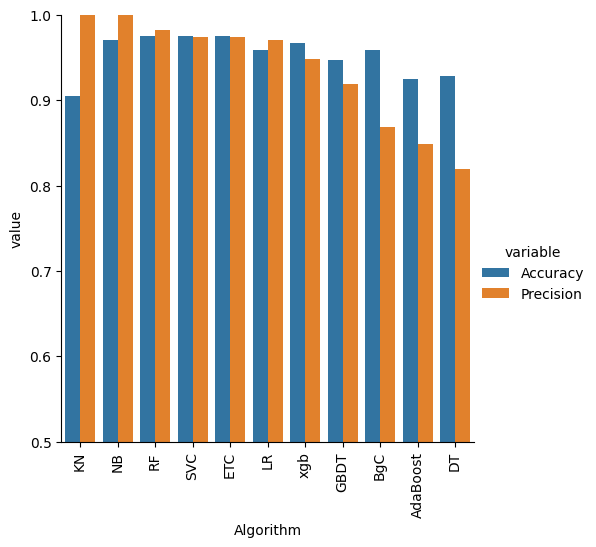

In [79]:
sns.catplot(x='Algorithm', y='value',
           hue= 'variable', data=performance_df1, kind = 'bar', height =5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
# model improve
# 1. Change the ,max_feature parameter of tfidf

In [81]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_feat_3000': accuracy_scores, 'Precision_max_feat_3000': precision_scores}).sort_values('Precision_max_feat_3000', ascending = False)

In [82]:
performance_df.merge(temp_df,on ='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_feat_3000,Precision_max_feat_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837


In [83]:
# voting classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [84]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et',etc)], voting='soft')

In [85]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [86]:
y_pred12 = voting.predict(x_test)
print("accuracy ", accuracy_score(y_test, y_pred12))
print("accuracy ", precision_score(y_test, y_pred12))

accuracy  0.9816247582205029
accuracy  0.9917355371900827


In [87]:
from sklearn.ensemble import StackingClassifier

In [88]:
estimators = [('svm', svc),('nb', mnb),('et',etc)]

final_estimator = RandomForestClassifier()

In [89]:
clf1 = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [90]:
clf1.fit(x_train,y_train)
y_pred13 = clf1.predict(x_test)
print("accuracy ", accuracy_score(y_test, y_pred13))
print("accuracy ", precision_score(y_test, y_pred13))

accuracy  0.9796905222437138
accuracy  0.9465648854961832


In [103]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))